<!-- dom:TITLE: Data Analysis and Machine Learning: Logistic Regression -->
# Data Analysis and Machine Learning: Logistic Regression
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Mar 11, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




<!-- !split  -->
## Logistic Regression

In linear regression our main interest was centered on learning the
coefficients of a functional fit (say a polynomial) in order to be
able to predict the response of a continuous variable on some unseen
data. The fit to the continuous variable $y_i$ is based on some
independent variables $\hat{x}_i$. Linear regression resulted in
analytical expressions (in terms of matrices to invert) for several
quantities, ranging from the variance and thereby the confidence
intervals of the parameters $\hat{\beta}$ to the mean squared
error. If we can invert the product of the design matrices, linear
regression gives then a simple recipe for fitting our data.


Classification problems, however, are concerned with outcomes taking
the form of discrete variables (i.e. categories). We may for example,
on the basis of DNA sequencing for a number of patients, like to find
out which mutations are important for a certain disease; or based on
scans of various patients' brains, figure out if there is a tumor or
not; or given a specific physical system, we'd like to identify its
state, say whether it is an ordered or disordered system (typical
situation in solid state physics); or classify the status of a
patient, whether she/he has a stroke or not and many other similar
situations.

The most common situation we encounter when we apply logistic
regression is that of two possible outcomes, normally denoted as a
binary outcome, true or false, positive or negative, success or
failure etc.

## Optimization and Deep learning

Logistic regression will also serve as our stepping stone towards neural
network algorithms and supervised deep learning. For logistic
learning, the minimization of the cost function leads to a non-linear
equation in the parameters $\hat{\beta}$. The optmization of the problem calls therefore for minimization algorithms. This forms the bottle neck of all machine learning algorithms, namely how to find reliable minima of a multi-variable function. This leads us to the family of gradient descent methods. The latter are the working horses of basically all modern machine learning algorithms. 

We note also that many of the topics discussed here 
regression are also commonly used in modern supervised Deep Learning
models, as we will see later.


<!-- !split  -->
## Basics

We consider the case where the dependent variables, also called the
responses or the outcomes, $y_i$ are discrete and only take values
from $k=0,\dots,K-1$ (i.e. $K$ classes).

The goal is to predict the
output classes from the design matrix $\hat{X}\in\mathbb{R}^{n\times p}$
made of $n$ samples, each of which carries $p$ features or predictors. The
primary goal is to identify the classes to which new unseen samples
belong.

Let us specialize to the case of two classes only, with outputs $y_i=0$ and $y_i=1$. Our outcomes could represent the status of a credit card user who could default or not on her/his credit card debt. That is

$$
y_i = \begin{bmatrix} 0 & \mathrm{no}\\  1 & \mathrm{yes} \end{bmatrix}.
$$

## Linear classifier

Before moving to the logistic model, let us try to use our linear regression model to classify these two outcomes. We could for example fit a linear model to the default case if $y_i > 0.5$ and the no default case $y_i \leq 0.5$. 

We would then have our 
weighted linear combination, namely

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\hat{y} = \hat{X}^T\hat{\beta} +  \hat{\epsilon},
\label{_auto1} \tag{1}
\end{equation}
$$

where $\hat{y}$ is a vector representing the possible outcomes, $\hat{X}$ is our
$n\times p$ design matrix and $\hat{\beta}$ represents our estimators/predictors.

## Some selected properties

The main problem with our  function is that it 
takes values on the entire real axis. In the case of
logistic regression, however, the labels $y_i$ are discrete
variables. 

One simple way to get a discrete output is to have sign
functions that map the output of a linear regressor to values $\{0,1\}$,
$f(s_i)=sign(s_i)=1$ if $s_i\ge 0$ and 0 if otherwise. 
We will encounter this model in our first demonstration of neural networks. Historically it is called the "perceptron" model in the machine learning
literature. This model is extremely simple. However, in many cases it is more
favorable to use a ``soft" classifier that outputs
the probability of a given category. This leads us to the logistic function.

The code for plotting the perceptron can be seen here. This si nothing but the standard [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function).

## The logistic function

The perceptron is an example of a ``hard classification" model. We
will encounter this model when we discuss neural networks as
well. Each datapoint is deterministically assigned to a category (i.e
$y_i=0$ or $y_i=1$). In many cases, it is favorable to have a "soft"
classifier that outputs the probability of a given category rather
than a single value. For example, given $x_i$, the classifier
outputs the probability of being in a category $k$.  Logistic regression
is the most common example of a so-called soft classifier. In logistic
regression, the probability that a data point $x_i$
belongs to a category $y_i=\{0,1\}$ is given by the so-called logit function (or Sigmoid) which is meant to represent the likelihood for a given event,

$$
p(t) = \frac{1}{1+\mathrm \exp{-t}}=\frac{\exp{t}}{1+\mathrm \exp{t}}.
$$

Note that $1-p(t)= p(-t)$.
The following code plots the logistic function.

## Two parameters

We assume now that we have two classes with $y_i$ either $0$ or $1$. Furthermore we assume also that we have only two parameters $\beta$ in our fitting of the Sigmoid function, that is we define probabilities

$$
\begin{align*}
p(y_i=1|x_i,\hat{\beta}) &= \frac{\exp{(\beta_0+\beta_1x_i)}}{1+\exp{(\beta_0+\beta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\hat{\beta}) &= 1 - p(y_i=1|x_i,\hat{\beta}),
\end{align*}
$$

where $\hat{\beta}$ are the weights we wish to extract from data, in our case $\beta_0$ and $\beta_1$. 

Note that we used

$$
p(y_i=0\vert x_i, \hat{\beta}) = 1-p(y_i=1\vert x_i, \hat{\beta}).
$$

<!-- !split  -->
## Maximum likelihood

In order to define the total likelihood for all possible outcomes from a  
dataset $\mathcal{D}=\{(y_i,x_i)\}$, with the binary labels
$y_i\in\{0,1\}$ and where the data points are drawn independently, we use the so-called [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE) principle. 
We aim thus at maximizing 
the probability of seeing the observed data. We can then approximate the 
likelihood in terms of the product of the individual probabilities of a specific outcome $y_i$, that is

$$
\begin{align*}
P(\mathcal{D}|\hat{\beta})& = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}\nonumber \\
\end{align*}
$$

from which we obtain the log-likelihood and our **cost/loss** function

$$
\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\hat{\beta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\hat{\beta}))\right]\right).
$$

## The cost function rewritten

Reordering the logarithms, we can rewrite the **cost/loss** function as

$$
\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n  \left(y_i(\beta_0+\beta_1x_i) -\log{(1+\exp{(\beta_0+\beta_1x_i)})}\right).
$$

The maximum likelihood estimator is defined as the set of parameters that maximize the log-likelihood where we maximize with respect to $\beta$.
Since the cost (error) function is just the negative log-likelihood, for logistic regression we have that

$$
\mathcal{C}(\hat{\beta})=-\sum_{i=1}^n  \left(y_i(\beta_0+\beta_1x_i) -\log{(1+\exp{(\beta_0+\beta_1x_i)})}\right).
$$

This equation is known in statistics as the **cross entropy**. Finally, we note that just as in linear regression, 
in practice we often supplement the cross-entropy with additional regularization terms, usually $L_1$ and $L_2$ regularization as we did for Ridge and Lasso regression.

## Minimizing the cross entropy

The cross entropy is a convex function of the weights $\hat{\beta}$ and,
therefore, any local minimizer is a global minimizer. 


Minimizing this
cost function with respect to the two parameters $\beta_0$ and $\beta_1$ we obtain

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \beta_0} = -\sum_{i=1}^n  \left(y_i -\frac{\exp{(\beta_0+\beta_1x_i)}}{1+\exp{(\beta_0+\beta_1x_i)}}\right),
$$

and

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \beta_1} = -\sum_{i=1}^n  \left(y_ix_i -x_i\frac{\exp{(\beta_0+\beta_1x_i)}}{1+\exp{(\beta_0+\beta_1x_i)}}\right).
$$

## A more compact expression

Let us now define a vector $\hat{y}$ with $n$ elements $y_i$, an
$n\times p$ matrix $\hat{X}$ which contains the $x_i$ values and a
vector $\hat{p}$ of fitted probabilities $p(y_i\vert x_i,\hat{\beta})$. We can rewrite in a more compact form the first
derivative of cost function as

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right).
$$

If we in addition define a diagonal matrix $\hat{W}$ with elements 
$p(y_i\vert x_i,\hat{\beta})(1-p(y_i\vert x_i,\hat{\beta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}\partial \hat{\beta}^T} = \hat{X}^T\hat{W}\hat{X}.
$$

## Extending to more predictors

Within a binary classification problem, we can easily expand our model to include multiple predictors. Our ratio between likelihoods is then with $p$ predictors

$$
\log{ \frac{p(\hat{\beta}\hat{x})}{1-p(\hat{\beta}\hat{x})}} = \beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_px_p.
$$

Here we defined $\hat{x}=[1,x_1,x_2,\dots,x_p]$ and $\hat{\beta}=[\beta_0, \beta_1, \dots, \beta_p]$ leading to

$$
p(\hat{\beta}\hat{x})=\frac{ \exp{(\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_px_p)}}{1+\exp{(\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_px_p)}}.
$$

## Including more classes

Till now we have mainly focused on two classes, the so-called binary system. Suppose we wish to extend to $K$ classes.
Let us for the sake of simplicity assume we have only two predictors. We have then following model

1
5
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\log{\frac{p(C=2\vert x)}{p(K\vert x)}} = \beta_{20}+\beta_{21}x_1,
$$

and so on till the class $C=K-1$ class

$$
\log{\frac{p(C=K-1\vert x)}{p(K\vert x)}} = \beta_{(K-1)0}+\beta_{(K-1)1}x_1,
$$

and the model is specified in term of $K-1$ so-called log-odds or **logit** transformations.


## The Softmax function

In our discussion of neural networks we will encounter the above again in terms of the so-called **Softmax** function.

The softmax function is used in various multiclass classification
methods, such as multinomial logistic regression (also known as
softmax regression), multiclass linear discriminant
analysis, naive Bayes classifiers, and artificial neural networks.
Specifically, in multinomial logistic regression and linear
discriminant analysis, the input to the function is the result of $K$
distinct linear functions, and the predicted probability for the $k$-th
class given a sample vector $\hat{x}$ and a weighting vector $\hat{\beta}$ is (with two predictors):

$$
p(C=k\vert \mathbf {x} )=\frac{\exp{(\beta_{k0}+\beta_{k1}x_1)}}{1+\sum_{l=1}^{K-1}\exp{(\beta_{l0}+\beta_{l1}x_1)}}.
$$

It is easy to extend to more predictors. The final class is

$$
p(C=K\vert \mathbf {x} )=\frac{1}{1+\sum_{l=1}^{K-1}\exp{(\beta_{l0}+\beta_{l1}x_1)}},
$$

and they sum to one. Our earlier discussions were all specialized to the case with two classes only. It is easy to see from the above that what we derived earlier is compatible with these equations. 

To find the optimal parameters we would typically use a gradient descent method.
Newton's method and gradient descent methods are discussed in the material on [optimization methods](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html). 



## A **scikit-learn** example

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


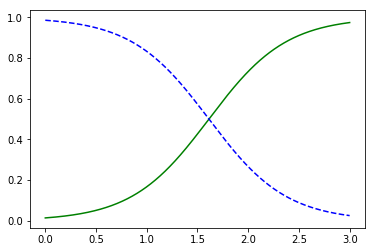

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target_names', 'feature_names', 'target', 'DESCR']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

## A simple classification problem

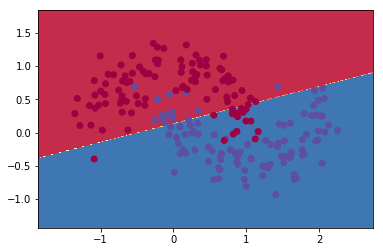

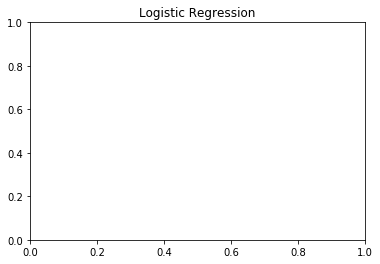

In [3]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y


def visualize(X, y, clf):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plot_decision_boundary(lambda x: clf.predict(x), X, y)
    plt.title("Logistic Regression")


def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


def classify(X, y):
    clf = linear_model.LogisticRegressionCV(cv=5)
    clf.fit(X, y)
    return clf


def main():
    X, y = generate_data()
    # visualize(X, y)
    clf = classify(X, y)
    visualize(X, y, clf)


if __name__ == "__main__":
    main()

<!-- !split  -->
## The two-dimensional Ising model, Predicting phase transition of the two-dimensional Ising model

The Hamiltonian of the two-dimensional Ising model without an external field for a constant coupling constant $J$ is given by

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
    H = -J \sum_{\langle ij\rangle} S_i S_j,
\label{_auto2} \tag{2}
\end{equation}
$$

where $S_i \in \{-1, 1\}$ and $\langle ij \rangle$ signifies that we only iterate over the nearest neighbors in the lattice. We will be looking at a system of $L = 40$ spins in each dimension, i.e., $L^2 = 1600$ spins in total. Opposed to the one-dimensional Ising model we will get a phase transition from an **ordered** phase to a **disordered** phase at the critical temperature

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
    \frac{T_c}{J} = \frac{2}{\log\left(1 + \sqrt{2}\right)} \approx 2.26,
\label{_auto3} \tag{3}
\end{equation}
$$

as shown by Lars Onsager.


Here we use **logistic regression** to predict when a phase transition
occurs. The data we will look at is a set of spin configurations,
i.e., individual lattices with spins, labeled **ordered** `1` or
**disordered** `0`. Our job is to build a model which will take in a
spin configuration and predict whether or not the spin configuration
constitutes an ordered or a disordered phase. To achieve this we will
represent the lattices as flattened arrays with $1600$ elements
instead of a matrix of $40 \times 40$ elements. As an extra test of
the performance of the algorithms we will divide the dataset into
three pieces. We will do a conventional train-test-split on a
combination of totally ordered and totally disordered phases. The
remaining "critical-like" states will be used as test data which we
hope the model will be able to make good extrapolated predictions on.

In [3]:
import pickle
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skms
import sklearn.linear_model as skl
import sklearn.metrics as skm
import tqdm
import copy
import time
from IPython.display import display

%matplotlib inline

sns.set(color_codes=True)

## Reading in the data

Using the data from [Mehta et al.](https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/) (specifically the two datasets named `Ising2DFM_reSample_L40_T=All.pkl` and `Ising2DFM_reSample_L40_T=All_labels.pkl`) we have to unpack the data into numpy arrays.

In [4]:
filenames = glob.glob(os.path.join("..", "dat", "*"))
label_filename = list(filter(lambda x: "label" in x, filenames))[0]
dat_filename = list(filter(lambda x: "label" not in x, filenames))[0]

# Read in the labels
with open(label_filename, "rb") as f:
    labels = pickle.load(f)

# Read in the corresponding configurations
with open(dat_filename, "rb") as f:
    data = np.unpackbits(pickle.load(f)).reshape(-1, 1600).astype("int")

# Set spin-down to -1
data[data == 0] = -1

This dataset consists of $10000$ samples, i.e., $10000$ spin
configurations with $40 \times 40$ spins each, for $16$ temperatures
between $0.25$ to $4.0$. Next we create a train/test-split and keep
the data in the critical phase as a separate dataset for
extrapolation-testing.

In [5]:
# Set up slices of the dataset
ordered = slice(0, 70000)
critical = slice(70000, 100000)
disordered = slice(100000, 160000)

X_train, X_test, y_train, y_test = skms.train_test_split(
    np.concatenate((data[ordered], data[disordered])),
    np.concatenate((labels[ordered], labels[disordered])),
    test_size=0.95
)

## Logistic regression

Logistic regression is a linear model for classification. Recalling
the cost function for ordinary least squares with both L2 (ridge) and
L1 (LASSO) penalties we will see that the logistic cost function is
very similar. In OLS we wish to predict a continuous variable
$\hat{y}$ using

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
    \hat{y} = X\omega,
\label{_auto4} \tag{4}
\end{equation}
$$

where $X \in \mathbb{R}^{n \times p}$ is the input data and $\omega^{p
\times d}$ are the weights of the regression. In a classification
setting (binary classification in our situation) we are interested in
a positive or negative answer. We can thus define either answer to be
above or below some threshold. But, in order to limit the size of the
answer and also to get a probability interpretation on how sure we are
for either answer we can compute the sigmoid function of OLS. That is,

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
    f(X\omega) = \frac{1}{1 + \exp(-X\omega)}.
\label{_auto5} \tag{5}
\end{equation}
$$

We are thus interested in minizming the following cost function

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
    C(X, \omega) = \sum_{i = 1}^n \left\{
        - y_i\log\left( f(x_i^T\omega) \right)
        - (1 - y_i)\log\left[1 - f(x_i^T\omega)\right]
    \right\},
\label{_auto6} \tag{6}
\end{equation}
$$

where we will restrict ourselves to a value for $f(z)$ as the sigmoid
described above. We can also tack on a L2 (Ridge) or L1 (LASSO)
penalization to this cost function in the same manner we did for
linear regression.

## Exploring the logistic regression

The penalization factor $\lambda$ is inverted in the case of the
logistic regression model we use. We will explore several values of
$\lambda$ using both L1 and L2 penalization. We do this using a grid
search over different parameters and run a 3-fold cross validation for
each configuration. In other words, we fit a model 3 times for each
configuration of the hyper parameters.

In [6]:
lambdas = np.logspace(-7, -1, 7)

param_grid = {
    "C": list(1.0/lambdas),
    "penalty": ["l1", "l2"]
}
clf = skms.GridSearchCV(
    skl.LogisticRegression(),
    param_grid=param_grid,
    n_jobs=-1,
    return_train_score=True
)
t0 = time.time()
clf.fit(X_train, y_train)
t1 = time.time()

print (
    "Time spent fitting GridSearchCV(LogisticRegression): {0:.3f} sec".format(
        t1 - t0
    )
)

We can see that logistic regression is quite slow and using the grid
search and cross validation results in quite a heavy
computation. Below we show the results of the different
configurations.

In [7]:
logreg_df = pd.DataFrame(clf.cv_results_)

display(logreg_df)

## Accuracy of a classification model

To determine how well a classification model is performing we count
the number of correctly labeled classes and divide by the number of
classes in total. The accuracy is thus given by

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
    a(y, \hat{y}) = \frac{1}{n}\sum_{i = 1}^{n} I(y_i = \hat{y}_i),
\label{_auto7} \tag{7}
\end{equation}
$$

where $I(y_i = \hat{y}_i)$ is the indicator function given by

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
    I(x = y) = \begin{array}{cc}
    1 & x = y, \\
    0 & x \neq y.
    \end{array}
\label{_auto8} \tag{8}
\end{equation}
$$

This is the accuracy provided by Scikit-learn when using **sklearn.metrics.accuracyscore**.

Below we compute the accuracy of the best fit model on the training data (which should give a good accuracy), the test data (which has not been shown to the model) and the critical data (completely new data that needs to be extrapolated).

In [8]:
train_accuracy = skm.accuracy_score(y_train, clf.predict(X_train))
test_accuracy = skm.accuracy_score(y_test, clf.predict(X_test))
critical_accuracy = skm.accuracy_score(labels[critical], clf.predict(data[critical]))

print ("Accuracy on train data: {0}".format(train_accuracy))
print ("Accuracy on test data: {0}".format(test_accuracy))
print ("Accuracy on critical data: {0}".format(critical_accuracy))

We can see that we get quite good accuracy on the training data, but gradually worsening accuracy on the test and critical data.

## Analyzing the results

Below we show a different metric for determining the quality of our
model, namely the **reciever operating characteristic** (ROC). The ROC
curve tells us how well the model correctly classifies the different
labels. We plot the **true positive rate** (the rate of predicted
positive classes that are positive) versus the **false positive rate**
(the rate of predicted positive classes that are negative). The ROC
curve is built by computing the true positive rate and the false
positive rate for varying **thresholds**, i.e, which probability we
should acredit a certain class.

By computing the **area under the curve** (AUC) of the ROC curve we get an estimate of how well our model is performing. Pure guessing will get an AUC of $0.5$. A perfect score will get an AUC of $1.0$.

In [9]:
fig = plt.figure(figsize=(20, 14))

for (_X, _y), label in zip(
    [
        (X_train, y_train),
        (X_test, y_test),
        (data[critical], labels[critical])
    ],
    ["Train", "Test", "Critical"]
):
    proba = clf.predict_proba(_X)
    fpr, tpr, _ = skm.roc_curve(_y, proba[:, 1])
    roc_auc = skm.auc(fpr, tpr)

    print ("LogisticRegression AUC ({0}): {1}".format(label, roc_auc))

    plt.plot(fpr, tpr, label="{0} (AUC = {1})".format(label, roc_auc), linewidth=4.0)

plt.plot([0, 1], [0, 1], "--", label="Guessing (AUC = 0.5)", linewidth=4.0)

plt.title(r"The ROC curve for LogisticRegression", fontsize=18)
plt.xlabel(r"False positive rate", fontsize=18)
plt.ylabel(r"True positive rate", fontsize=18)
plt.axis([-0.01, 1.01, -0.01, 1.01])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="best", fontsize=18)
plt.show()

We can see that this plot of the ROC looks very strange. This tells us
that logistic regression is quite inept at predicting the Ising model
transition and is therefore highly non-linear. The ROC curve for the
training data looks quite good, but as the testing data is so far off
we see that we are dealing with an overfit model.